*Contenuti*
===

- [Resampling](#Resampling)
- [Esercizio 2.1](#Esercizio-2.1)
- [Rolling windows](#Rolling-windows)
    - [Esercizio 2.2](#Esercizio-2.2)
- [Analisi dei trend di una serie temporale](#Analisi-dei-trend-di-una-serie-temporale)
    - [Esercizio 2.3](#Esercizio-2.3)
    - [Esempi generali di trend](#Esempi-generali-di-trend)
- [Decomposizione](#Decomposizione)
    - [Modello additivo](#Modello-additivo)
    - [*seasonal_decompose*](#seasonal_decompose)
- [Forecast](#Forecast)
    - [Facebook Prophet](#Facebook-Prophet)

Nella prima lezione abbiamo visto alcuni esempi di manipolazione e visualizzazione di dati temporali con Pandas, Matplotlib e Seaborn. Abbiamo utilizzato questi strumenti per analizzare la stagionalità di una serie temporale.

Ripartiamo da qui.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [13]:
df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')

df.head()

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN
2006-01-04,1457.217,NaN,NaN
2006-01-05,1477.131,NaN,NaN


Resampling
---
Quando si campiona una serie temporale a una frequenza più bassa di quella originale stiamo facendo *downsampling*. Per questa operazione ci serve una funzione di aggregazione.

Viceversa, aumentare la frequenza di una serie temporale si chiama *upsampling*. Di che ingrediente abbiamo bisogno in questo caso?


Il downsampling è un altro strumento valido per analizzare la stagionalità di una serie temporale. La funzione *resample* di Pandas fa al caso nostro.

In [14]:
df['Consumption']['2013']

Date
2013-01-01     906.910
2013-01-02    1160.174
2013-01-03    1199.565
2013-01-04    1198.952
2013-01-05    1108.271
                ...   
2013-12-27    1166.552
2013-12-28    1089.790
2013-12-29    1031.149
2013-12-30    1149.097
2013-12-31    1068.429
Name: Consumption, Length: 365, dtype: float64

In [15]:
df['Consumption']['2013'].resample('W')

Pandas prevede scorciatoie (*alias*) per alcune frequenze di ricampionamento (*offset*). Qui l'elenco completo: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases.

Da sola, la funzione resample non basta. Come abbiamo accennato, ci serve una funzione di aggregazione.

In [16]:
df['Consumption']['2013'].resample('W').mean()

Date
2013-01-06    1101.531333
2013-01-13    1322.050286
2013-01-20    1388.535857
2013-01-27    1402.458000
2013-02-03    1319.079429
2013-02-10    1353.813857
2013-02-17    1367.142143
2013-02-24    1348.114857
2013-03-03    1333.157143
2013-03-10    1288.966000
2013-03-17    1330.768000
2013-03-24    1319.451143
2013-03-31    1225.623571
2013-04-07    1264.175571
2013-04-14    1278.603143
2013-04-21    1247.121286
2013-04-28    1246.434286
2013-05-05    1187.129714
2013-05-12    1181.149286
2013-05-19    1216.388857
2013-05-26    1179.325857
2013-06-02    1165.471429
2013-06-09    1190.125429
2013-06-16    1194.735857
2013-06-23    1220.914571
2013-06-30    1183.650857
2013-07-07    1204.902429
2013-07-14    1198.380429
2013-07-21    1203.554857
2013-07-28    1222.830143
2013-08-04    1215.101143
2013-08-11    1220.390714
2013-08-18    1193.074286
2013-08-25    1207.629714
2013-09-01    1219.791857
2013-09-08    1262.145571
2013-09-15    1263.348857
2013-09-22    1282.007857
2013-09

Tra gli argomenti della funzione resample, *label* permette di scegliere se assegnare al nuovo indice il valore dell'estremo sinistro o destro della finestra.

In [17]:
df['Consumption']['2013'].resample('W', label='left').mean()

Date
2012-12-30    1101.531333
2013-01-06    1322.050286
2013-01-13    1388.535857
2013-01-20    1402.458000
2013-01-27    1319.079429
2013-02-03    1353.813857
2013-02-10    1367.142143
2013-02-17    1348.114857
2013-02-24    1333.157143
2013-03-03    1288.966000
2013-03-10    1330.768000
2013-03-17    1319.451143
2013-03-24    1225.623571
2013-03-31    1264.175571
2013-04-07    1278.603143
2013-04-14    1247.121286
2013-04-21    1246.434286
2013-04-28    1187.129714
2013-05-05    1181.149286
2013-05-12    1216.388857
2013-05-19    1179.325857
2013-05-26    1165.471429
2013-06-02    1190.125429
2013-06-09    1194.735857
2013-06-16    1220.914571
2013-06-23    1183.650857
2013-06-30    1204.902429
2013-07-07    1198.380429
2013-07-14    1203.554857
2013-07-21    1222.830143
2013-07-28    1215.101143
2013-08-04    1220.390714
2013-08-11    1193.074286
2013-08-18    1207.629714
2013-08-25    1219.791857
2013-09-01    1262.145571
2013-09-08    1263.348857
2013-09-15    1282.007857
2013-09

Costruiamo un nuovo dataframe in modo da poterlo plottare comodamente insieme al precedente.

In [18]:
df_consumption_2013_weekly = df['Consumption']['2013'].resample('W').mean()

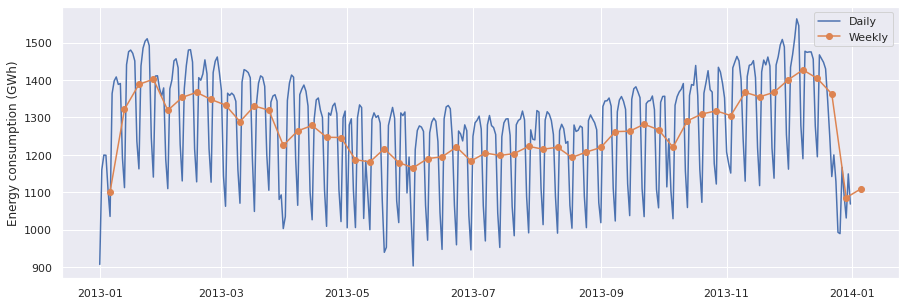

In [19]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df['Consumption']['2013'], label='Daily')
ax.plot(df_consumption_2013_weekly, marker='o', label='Weekly')
ax.set_ylabel('Energy consumption (GWh)')
ax.legend()

Che effetto abbiamo ottenuto ricampionando con una finestra temporale settimanale?

Esercizio 2.1
---
Confrontare in un unico plot l'andamento mensile di
- consumo di energia elettrica
- produzione di energia rinnovabile (solare, eolica e somma delle due).

Rappresentare l'andamento annuale del rapporto tra
- produzione di energia rinnovabile
- consumo di energia elettrica.

Rolling windows
===
Vediamo adesso un altro strumento di manipolazione di Pandas. Come resample, anche *rolling* prevede un raggruppamento con relativa funzione di aggregazione.

Immaginiamo di analizzare i valori di consumo all'interno di una finestra temporale di 3 giorni.

In [30]:
df['Consumption']

Date
2006-01-01    1069.18400
2006-01-02    1380.52100
2006-01-03    1442.53300
2006-01-04    1457.21700
2006-01-05    1477.13100
                 ...    
2017-12-27    1263.94091
2017-12-28    1299.86398
2017-12-29    1295.08753
2017-12-30    1215.44897
2017-12-31    1107.11488
Name: Consumption, Length: 4383, dtype: float64

Facciamo scorrere la finestra da sinistra: ai primi 2 step questa conterrà rispettivamente solo 1 e 2 valori.

In [31]:
df['Consumption'][:1]

Date
2006-01-01    1069.184
Name: Consumption, dtype: float64

In [32]:
df['Consumption'][:2]

Date
2006-01-01    1069.184
2006-01-02    1380.521
Name: Consumption, dtype: float64

A questo punto la finestra si sovrappone ai primi tre valori di consumo.

In [24]:
df['Consumption'][:3]

Date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
Name: Consumption, dtype: float64

Il processo itera facendo scorrere sequenzialmente la finestra verso destra, una posizione alla volta.

In [33]:
df['Consumption'][1:4]

Date
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
Name: Consumption, dtype: float64

In [34]:
df['Consumption'][2:5]

Date
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: Consumption, dtype: float64

Supponiamo adesso di voler aggregare, ad ogni step, i dati all'interno della finestra. Per esempio, sommandoli.

In [35]:
df['Consumption'][:1].sum()

1069.1840000000002

In [36]:
df['Consumption'][:2].sum()

2449.705000000001

In [37]:
df['Consumption'][:3].sum()

3892.2380000000007

In [38]:
df['Consumption'][1:4].sum()

4280.271000000001

In [39]:
df['Consumption'][2:5].sum()

4376.881

Una volta scelta l'ampiezza della finestra e la funzione di aggregazione, rolling permette di eseguire questa operazione in modo compatto.

In [41]:
df['Consumption'].rolling('3D').sum()

Date
2006-01-01    1069.18400
2006-01-02    2449.70500
2006-01-03    3892.23800
2006-01-04    4280.27100
2006-01-05    4376.88100
                 ...    
2017-12-27    3505.34112
2017-12-28    3693.92172
2017-12-29    3858.89242
2017-12-30    3810.40048
2017-12-31    3617.65138
Name: Consumption, Length: 4383, dtype: float64

Si può specificare l'ampiezza della finestra anche con il numero di record che questa deve includere.

In [49]:
df['Consumption'].rolling(3).sum()

Date
2006-01-01           NaN
2006-01-02           NaN
2006-01-03    3892.23800
2006-01-04    4280.27100
2006-01-05    4376.88100
                 ...    
2017-12-27    3505.34112
2017-12-28    3693.92172
2017-12-29    3858.89242
2017-12-30    3810.40048
2017-12-31    3617.65138
Name: Consumption, Length: 4383, dtype: float64

Con questa scelta la finestra scarta di default tutti i gruppi dove mancano alcuni valori. Questo comportamento si può modificare con gli argomenti opzionali della funzione.

In [46]:
df['Consumption'].rolling(3, min_periods=1).sum()

Date
2006-01-01    1069.18400
2006-01-02    2449.70500
2006-01-03    3892.23800
2006-01-04    4280.27100
2006-01-05    4376.88100
                 ...    
2017-12-27    3505.34112
2017-12-28    3693.92172
2017-12-29    3858.89242
2017-12-30    3810.40048
2017-12-31    3617.65138
Name: Consumption, Length: 4383, dtype: float64

Vediamo altri esempi di utilizzo.

In [47]:
df['Consumption'].rolling(3, center=True).sum()

Date
2006-01-01           NaN
2006-01-02    3892.23800
2006-01-03    4280.27100
2006-01-04    4376.88100
2006-01-05    4337.77500
                 ...    
2017-12-27    3693.92172
2017-12-28    3858.89242
2017-12-29    3810.40048
2017-12-30    3617.65138
2017-12-31           NaN
Name: Consumption, Length: 4383, dtype: float64

In [48]:
df['Consumption'][:7].sum()

9530.300000000001

In [45]:
df['Consumption'].rolling(7, center=True).sum()

Date
2006-01-01           NaN
2006-01-02           NaN
2006-01-03           NaN
2006-01-04    9530.30000
2006-01-05    9669.10100
                 ...    
2017-12-27    8457.49890
2017-12-28    8422.85648
2017-12-29           NaN
2017-12-30           NaN
2017-12-31           NaN
Name: Consumption, Length: 4383, dtype: float64

Adesso vediamo il risultato grafico prodotto da rolling. Per comodità, settiamo una volta per tutte la proprietà *figsize* di Matplotlib.

In [52]:
plt.rcParams['figure.figsize'] = (15,5)

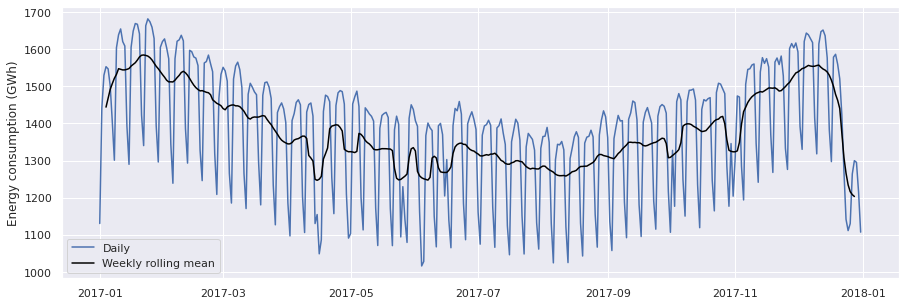

In [53]:
plt.plot(df['Consumption']['2017'],
         label='Daily')

plt.plot(df['Consumption']['2017'].rolling(7, center=True).mean(),
         label='Weekly rolling mean',
         color='black')

plt.ylabel('Energy consumption (GWh)')
plt.legend()

Esercizio 2.2
---
Abbiamo visto che resample e rolling partono da un'idea comune. Che differenza c'è tra i risultati che producono?


Rappresentare i valori medi settimanali di produzione di energia solare nel periodo 01-07 2017, utilizzando le funzioni resample e rolling. Confrontare i due risultati prodotti.

---

**Recap**: sia il downsampling che l'applicazione di una rolling window producono un effetto di smoothing sulla serie temporale. In particolare, vengono cancellate le variazioni che avvengono a una frequenza minore o uguale a quella della finestra temporale utilizzata.

Eliminando le variazioni stagionali è possibile analizzare un' altra componente fondamentale di una serie temporale: il **trend**.

Analisi dei trend di una serie temporale
---

Partiamo dalla visualizzazione dei dati di consumo a frequenza giornaliera.

Text(0.5, 1.0, 'Electrical power consumption (GWh)')

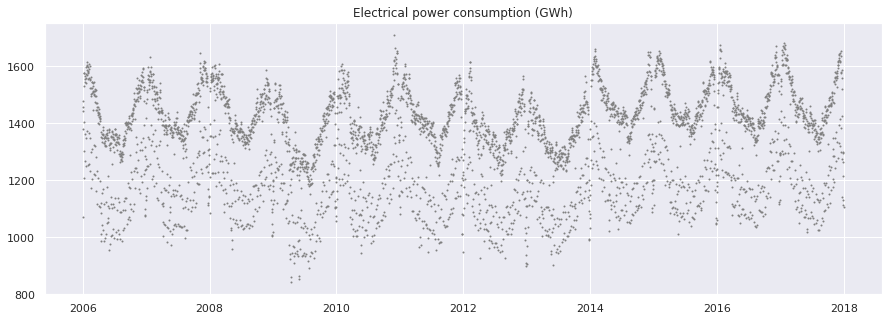

In [68]:
plt.plot(df['Consumption'],
         marker='.',
         markersize=2,
         linestyle='',
         color='gray')
plt.title('Electrical power consumption (GWh)')

Come abbiamo visto nella scorsa lezione, il consumo tedesco di energia elettrica presenta stagionalità annuale e settimanale.

Aggiungiamo al grafico la media mobile settimanale dei consumi.

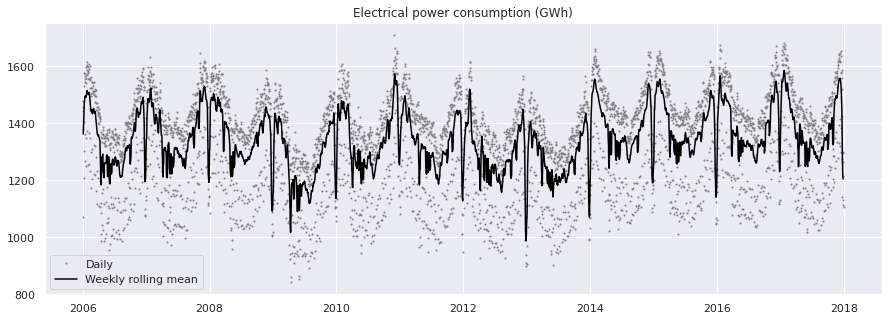

In [69]:
plt.plot(df['Consumption'],
         marker='.',
         markersize=2,
         linestyle='',
         label='Daily',
         color='gray')

plt.plot(df['Consumption'].rolling(7, center=True).mean(),
         label='Weekly rolling mean',
         color='black')

plt.title('Electrical power consumption (GWh)')
plt.legend()

Come ci aspettiamo, la media mobile settimanale cancella la relativa stagionalità. Viene così messa in evidenza la stagionalità annuale: notiamo
- l'andamento oscillatorio dovuto all'utilizzo del riscaldamento e dell'illuminazione
- i picchi negativi invernali in corrispondenza del periodo di vacanza.

Continuiamo l'analisi aggiungendo al grafico la media mobile annuale.

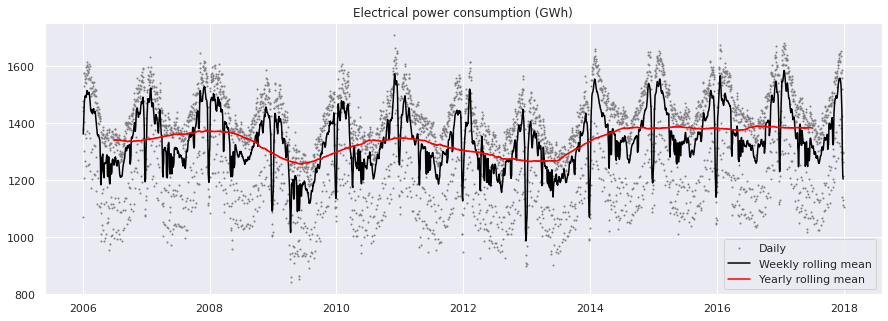

In [70]:
plt.plot(df['Consumption'],
         marker='.',
         markersize=2,
         linestyle='',
         label='Daily',
         color='gray')

plt.plot(df['Consumption'].rolling(7, center=True).mean(),
         label='Weekly rolling mean',
         color='black')

plt.plot(df['Consumption'].rolling(365, center=True).mean(),
         label='Yearly rolling mean',
         color='red')

plt.title('Electrical power consumption (GWh)')
plt.legend()

Una volta eliminata la stagionalità di una serie, quello che rimane è il suo trend di lungo periodo.

Esercizio 2.3
---

Ripetere l'analisi appena vista per la produzione di energia solare a partire dal 2012.

Confrontare i trend di
- produzione di energia solare
- produzione di energia eolica
- produzione totale di energia rinnovabile.

---

Esempi generali di trend
---
Prima di proseguire, facciamo un brevissimo confronto tra alcuni tipi di trend. Generiamoli sinteticamente con NumPy.

In [84]:
import numpy as np

In [85]:
plt.rcParams['figure.figsize'] = (15,3)

Un trend lineare è assimilabile a una linea retta: il tasso di crescita non cambia nel tempo.

In [86]:
linear_trend = np.array([5*t for t in range(50)])
linear_trend

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245])

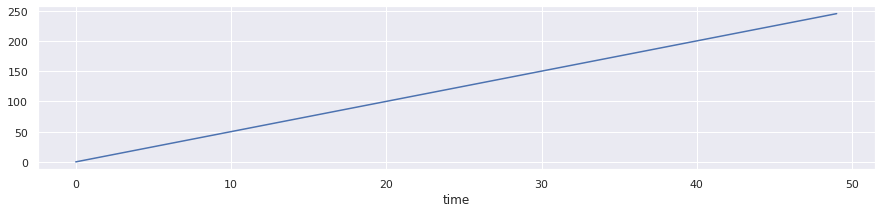

In [87]:
plt.xlabel('time')
plt.plot(linear_trend)

Un trend quadratico, più in generale uno polinomiale, è assimilabile ad una curva. Il tasso di crescita varia nel tempo.

In [88]:
quadratic_trend = np.array([t**2 for t in range(50)])
quadratic_trend

array([   0,    1,    4,    9,   16,   25,   36,   49,   64,   81,  100,
        121,  144,  169,  196,  225,  256,  289,  324,  361,  400,  441,
        484,  529,  576,  625,  676,  729,  784,  841,  900,  961, 1024,
       1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849,
       1936, 2025, 2116, 2209, 2304, 2401])

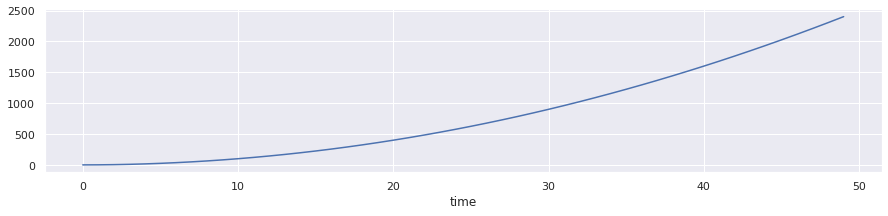

In [89]:
plt.xlabel('time')
plt.plot(quadratic_trend)

Anche un trend esponenziale è una curva, ma il suo tasso di crescita sale in modo molto più rapido: il tempo è all'esponente!

In [90]:
exponential_trend = np.array([2**t for t in range(50)])
exponential_trend

array([              1,               2,               4,               8,
                    16,              32,              64,             128,
                   256,             512,            1024,            2048,
                  4096,            8192,           16384,           32768,
                 65536,          131072,          262144,          524288,
               1048576,         2097152,         4194304,         8388608,
              16777216,        33554432,        67108864,       134217728,
             268435456,       536870912,      1073741824,      2147483648,
            4294967296,      8589934592,     17179869184,     34359738368,
           68719476736,    137438953472,    274877906944,    549755813888,
         1099511627776,   2199023255552,   4398046511104,   8796093022208,
        17592186044416,  35184372088832,  70368744177664, 140737488355328,
       281474976710656, 562949953421312])

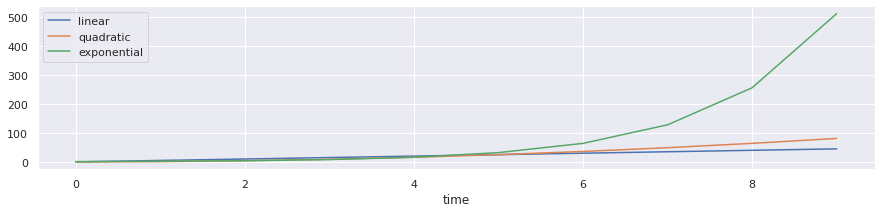

In [91]:
plt.plot(linear_trend[:10], label='linear')
plt.plot(quadratic_trend[:10], label='quadratic')
plt.plot(exponential_trend[:10], label='exponential')

plt.xlabel('time')
plt.legend()

**Recap**: abbiamo definito e analizzato due delle componenti di una serie temporale, la stagionalità e il trend.

Decomposizione
===
Proseguiamo con il concetto più generale di *decomposizione* di una serie.

Modello additivo
---

Trend e stagionalità sono componenti strutturali, *sistematiche* di una serie temporale; possono essere studiate e modellate. Questo processo è la base per il forecast, la previsione del comportamento futuro della serie.

Un'altra componente sistematica di una serie è il suo **livello**: semplicemente, il valor medio intorno al quale si muovono i suoi valori. Possiamo pensare al livello come a un trend lineare piatto (a crescita 0).

Un modello generale di serie temporale è:

<h3><center><i>LIVELLO + TREND + STAGIONALITÀ + $\epsilon.$</i></center></h3>

Questo è detto **modello additivo**, perché è *la somma delle sue componenti*. Il termine $\epsilon$ è detto **rumore**: si tratta della componente di errore non sistematica che non può essere direttamente modellata.

Costruiamo artificialmente una serie temporale, componente per componente. Partiamo dal livello.

Text(0.5, 1.0, 'level')

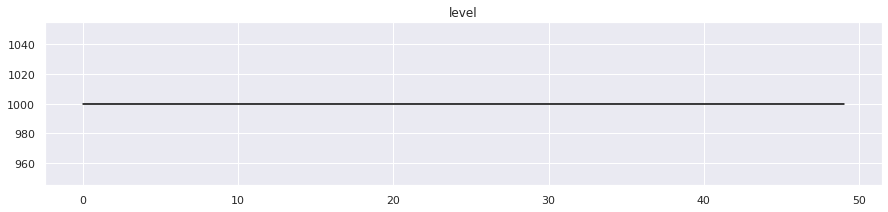

In [95]:
level = 1000*np.ones(50)

plt.plot(level, color='black')
plt.title('level')

Aggiungiamo la prima componente alla nostra serie temporale.

Text(0.5, 1.0, 'time series')

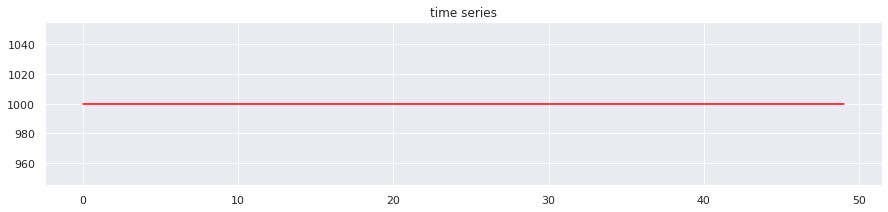

In [96]:
time_series = level

plt.plot(time_series, color='red')
plt.title('time series')

Passiamo alla componente di stagionalità. Utilizziamo la funzione *sin* di NumPy per generare un segnale periodico.

Text(0.5, 1.0, 'seasonality')

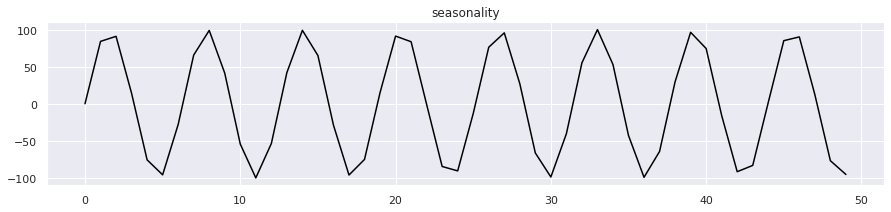

In [97]:
seasonality = np.array([100*np.sin(i) for i in range(50)])
seasonality = 100*np.sin([i for i in range(50)])

plt.plot(seasonality, color='black')
plt.title('seasonality')

Aggiungiamo quindi la componente stagionale alla serie.

Text(0.5, 1.0, 'time series')

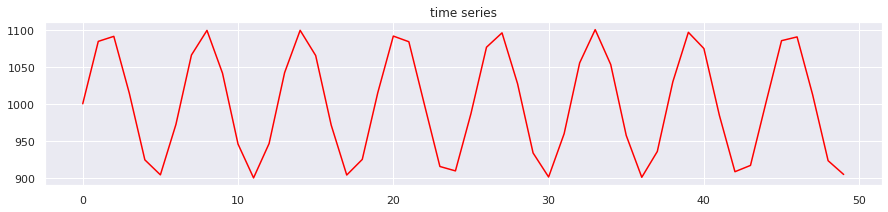

In [98]:
time_series = level + seasonality

plt.plot(time_series, color='red')
plt.title('time series')

In [ ]:
#volendo, aggiungere qui linear trend ed eliminare parte sui vari trend

Infine, aggiungiamo alla serie un trend lineare crescente.

Text(0.5, 1.0, 'time series')

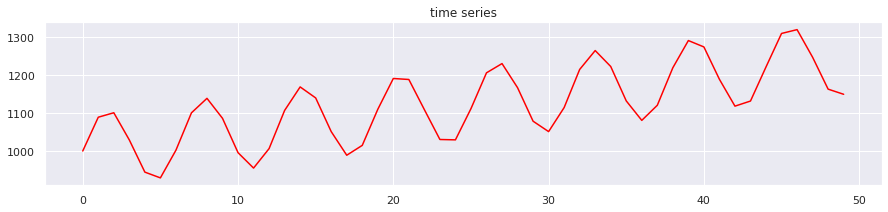

In [99]:
time_series = level + seasonality + linear_trend

plt.plot(time_series, color='red')
plt.title('time series')

Un altro tipo di modello è quello **moltiplicativo**, nel quale le componenti sono legate tra loro in modo non lineare.

In questo esempio, la componente di stagionalità viene moltiplicata con il (e quindi amplificata dal) trend.

Text(0.5, 1.0, 'time series')

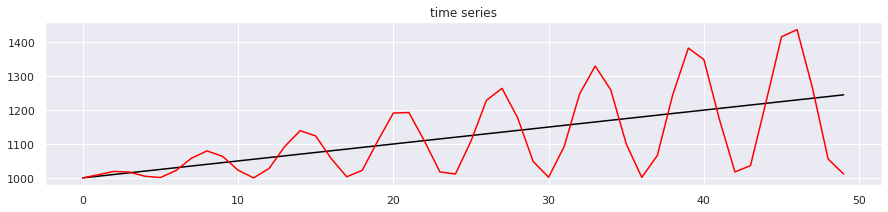

In [101]:
time_series = level + linear_trend + 0.01*linear_trend*seasonality

plt.plot(level+linear_trend, color='black')
plt.plot(time_series, color='red')
plt.title('time series')

*seasonal_decompose*
---

La funzione *seasonal_decompose* della libreria *statsmodel* permette di decomporre una serie nelle sue componenti costitutive.

**Nota**: si tratta di una decomposizione molto semplice: in letteratura ne esistono di più raffinate: https://otexts.com/fpp2/decomposition.html.

In [128]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [129]:
decomposition = seasonal_decompose(df['Consumption']['2015-01':'2015-06'])

L'oggetto restituito contiene una series Pandas per ognuna delle componenti.

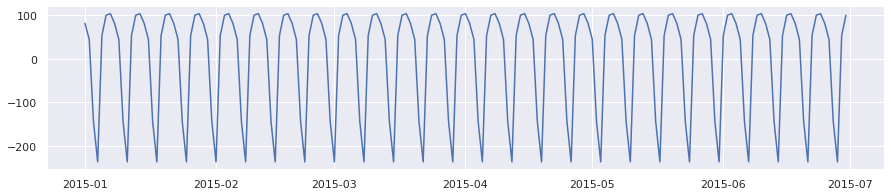

In [130]:
plt.figure(figsize=(15,3))
plt.plot(decomposition.seasonal)

È possibile visualizzare tutte le componenti in un'unica cella.

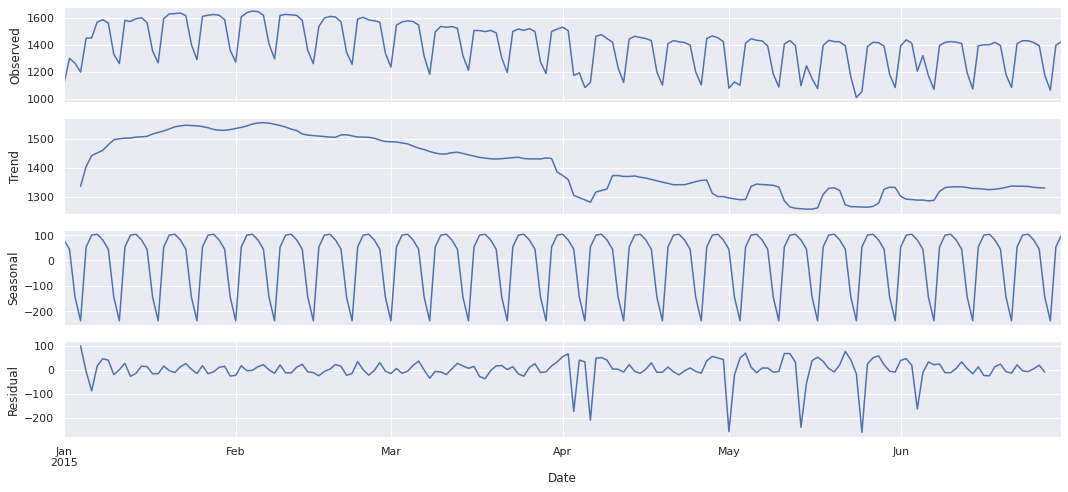

In [131]:
plt.rcParams['figure.figsize'] = (15,7)
plot = decomposition.plot()#evita plot doppi

**Recap**: una serie temporale additiva è la somma di componenti sistematiche (livello, trend, stagionalità) e di un termine di rumore non modellabile. In un modello moltiplicativo queste componenti sono legate in modo non lineare.

Forecast
===
Come discusso nella prima lezione, l'analisi di una serie temporale è fondamentale per prevedere il suo comportamento futuro.

Il forecast di serie temporali è un processo difficile che richiede competenze tecniche, scientifiche e di business. Esistono diversi modelli di previsione, ciascuno con la sua intuizione teorica e un numero di parametri da calibrare. Ecco alcune risorse utili per approfondire:

- https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
- https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
- https://www.youtube.com/watch?v=d4Sn6ny_5LI.

Facebook Prophet
---
Prophet è una procedura di forecasting rilasciata nel 2017 da Facebook. Ecco alcune caratteristiche che lo rendono molto versatile:

- gestisce stagionalità multiple e bruschi cambiamenti di trend
- è resistente a dati mancanti e outlier
- è di facile utilizzo immediato e al tempo stesso altamente configurabile.

Vediamo alcuni esempi di utilizzo.

---

<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by OVHCloud.
</footer>